# Common Conversion Point Stack of a Single Station

The following notebook carries you through how to get from 
a set of receiver functions of a single station to a 3D 
common conversion point (CCP) stack. 
As an example as in the previous notebooks,
we again use IU-HRV as example station. 

---
***Note***:

It is assumed here that you have successfully computed the
receiver functions from the `00_DataCollection.ipynb`.

---

## Load the Receiver functions

So, first load the receiver function into a `RFStream`.

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Number of loaded RFs:  815


<AxesSubplot:xlabel='Conversion Time [s]', ylabel='A    '>

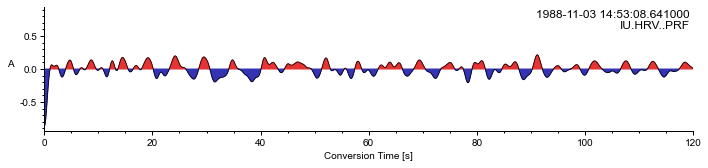

In [3]:
from pyglimer.rf.create import read_rf
from pyglimer.plot.plot_utils import set_mpl_params
set_mpl_params()

rfst = read_rf("database/waveforms/RF/P/IU/HRV/*.sac")

# Check traces
print("Number of loaded RFs: ", len(rfst))
rfst[0].plot()

## Compute Common Conversion Point Stack

This is similar to the single station stacks.


In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from pyglimer.ccp import init_ccp
import os
import numpy as np

# Define the location of the database
databaselocation = "database"
inter_bin_distance = 0.1
velocity_model = 'iasp91.dat'

ccp_init_dict = {
    "binrad": np.cos(np.radians(30)),
    "phase": 'P',
    "statloc": os.path.join(databaselocation, "stations"),
    "preproloc": os.path.join(databaselocation, "waveforms", "preprocessed"),
    "rfloc": os.path.join(databaselocation, "waveforms", "RF"),
    "network": "IU",
    "station": "HRV",
    "compute_stack": True,
    "save": 'ccp_IU_HRV.pkl'
}

# Initialize bins
ccpstack = init_ccp(inter_bin_distance, 
                    velocity_model, 
                    **ccp_init_dict)

  0%|          | 0/82 [00:00<?, ?it/s]

Number of receiver functions used: 815
Number of cores used: 12
Available system memory: 17179.869184MB


100%|██████████| 82/82 [00:37<00:00,  2.16it/s]


Stacking finished.


Finalizing the CCPStack

In [7]:
ccpstack.conclude_ccp()

### Plot bins

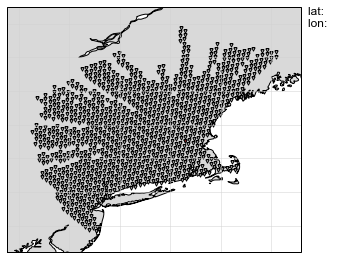

In [8]:
# Plot bins
# %matplotlib widget
import matplotlib.pyplot as plt
plt.ion()
ccpstack.plot_bins()

### Read stack from file and interpolate volume

In [29]:
import numpy as np
from pyglimer.ccp.ccp import read_ccp

ccpstack = read_ccp(filename='ccp_IU_HRV.pkl', fmt=None)

lats = np.arange(41, 43.5, 0.05)
lons = np.arange(-72.7, -69.5, 0.05)
z = np.linspace(-10, 200, 211)


### Use the `CCPStack` object to compute volume

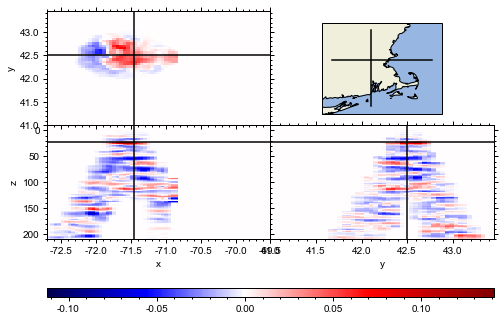

In [50]:
from pyglimer.plot.plot_volume import VolumePlot

vplot = ccpstack.plot_volume_sections(lons, lats, zmax=211, lonsl=-71.45, latsl=42.5, zsl=23)

## Compute a "dirty" global CCP stack

In short, we are assuming that latitudes and longitudes are cartesian entities, with a small correction for the area of each bin that depends on the change in metric width of a degree of longitude as a function of latitude.

In [13]:
from pyglimer.rf.create import read_rf
from pyglimer.plot.plot_utils import set_mpl_params
set_mpl_params()

rfst = read_rf("database/waveforms/RF/P/IU/HRV/*.sac")

Compute move-out correction and piercing points:

In [15]:
z, rfz = rfst.moveout(vmodel='iasp91.dat')

In [34]:
rfz[0].stats

          network: IU
          station: HRV
         location: 
          channel: PRF
        starttime: 1988-11-03T14:53:08.641000Z
          endtime: 1988-11-03T14:54:33.641000Z
    sampling_rate: 10.0
            delta: 0.1
             npts: 851
            calib: 1.0
          _format: SAC
     back_azimuth: 215.59
         distance: 32.9327
      event_depth: 70000.0
   event_latitude: 13.8678
  event_longitude: -90.5523
  event_magnitude: 5.6
       event_time: 1988-11-03T14:47:10.960000Z
            onset: 1988-11-03T14:53:38.592111Z
            phase: P
         pp_depth: [ -2.00000000e-01  -1.00000000e-01   0.00000000e+00   1.00000000e+00
   2.00000000e+00   3.00000000e+00   4.00000000e+00   5.00000000e+00
   6.00000000e+00   7.00000000e+00   8.00000000e+00   9.00000000e+00
   1.00000000e+01   1.10000000e+01   1.20000000e+01   1.30000000e+01
   1.40000000e+01   1.50000000e+01   1.60000000e+01   1.70000000e+01
   1.80000000e+01   1.90000000e+01   2.00000000e+01   2.10000000e

In [16]:
latc, lonc, zc, stack = rfz.dirty_ccp_stack()

lat: 851
lon: 851
dep: 753
rfs: 851
lat: 851
lon: 851
dep: 753
rfs: 851
lat: 851
lon: 851
dep: 753
rfs: 851
lat: 851
lon: 851
dep: 753
rfs: 851


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3404 and the array at index 2 has size 3012

In [8]:
rfst.moveout(vmodel='iasp91.dat')

In [9]:
rfst[0].stats.type

'time'

In [ ]:
rfst[0].stats.type